In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [3]:
# Load the dataset
data = pd.read_csv('dataset.csv')

In [4]:
# Display basic dataset information
print("Dataset Shape:", data.shape)
print("\nDataset Preview:\n", data.head())

Dataset Shape: (1190, 12)

Dataset Preview:
    age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [5]:
# Exploratory Data Analysis (EDA)
print("\nSummary Statistics:\n", data.describe())
print("\nMissing Values:\n", data.isnull().sum())


Summary Statistics:
                age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.87035

In [6]:
print(data.columns)

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


/tmp/ipykernel_21370/3933433772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='viridis')


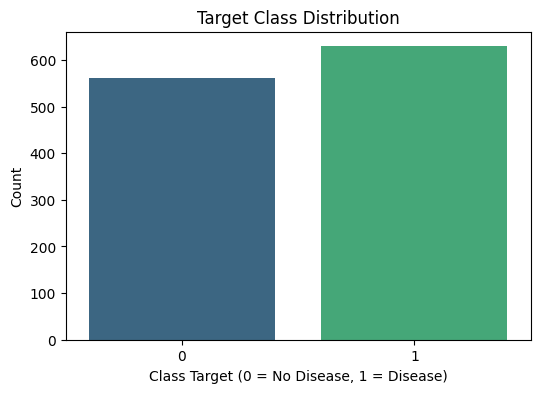

In [7]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data, palette='viridis')
plt.title('Target Class Distribution')
plt.xlabel('Class Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

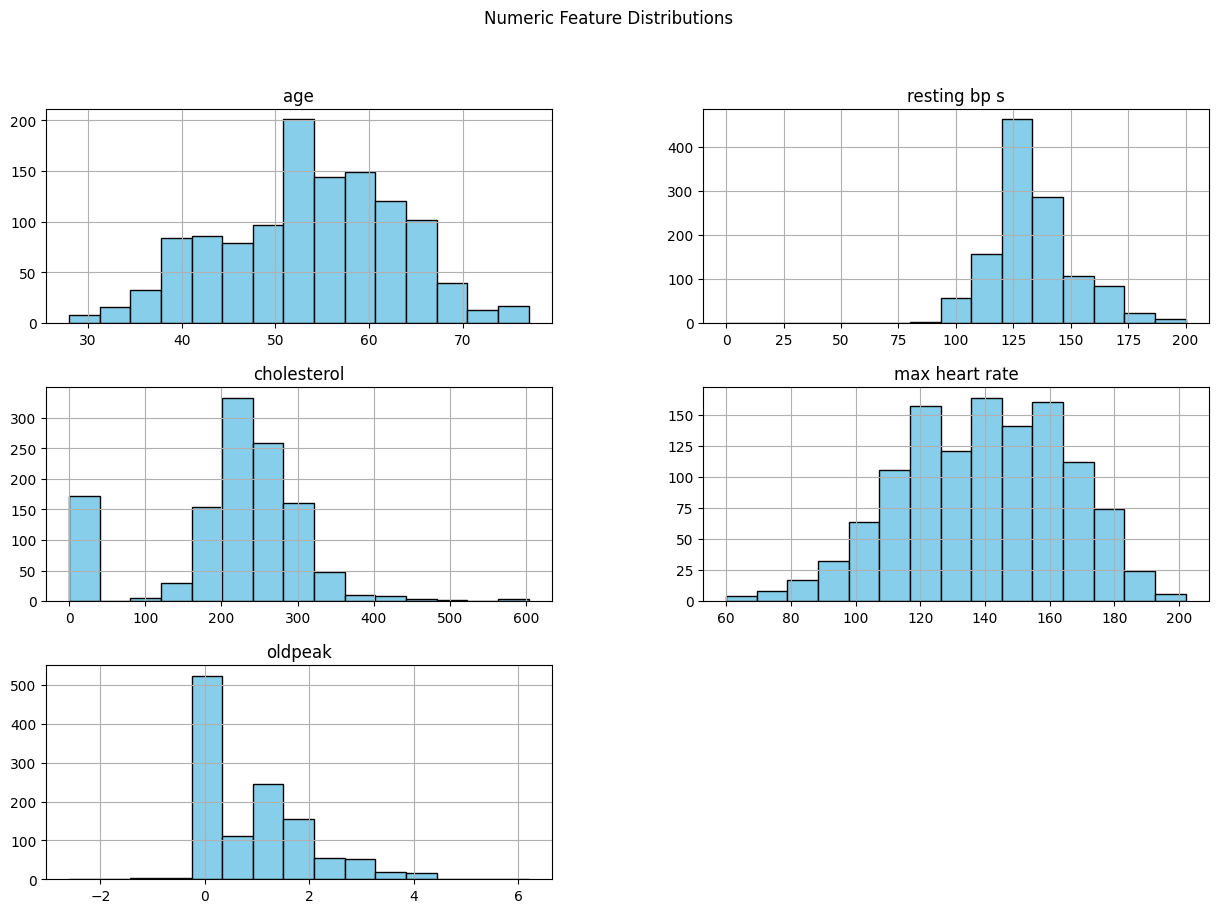

In [8]:
# Visualize numeric feature distributions
numeric_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
data[numeric_features].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Numeric Feature Distributions')
plt.show()

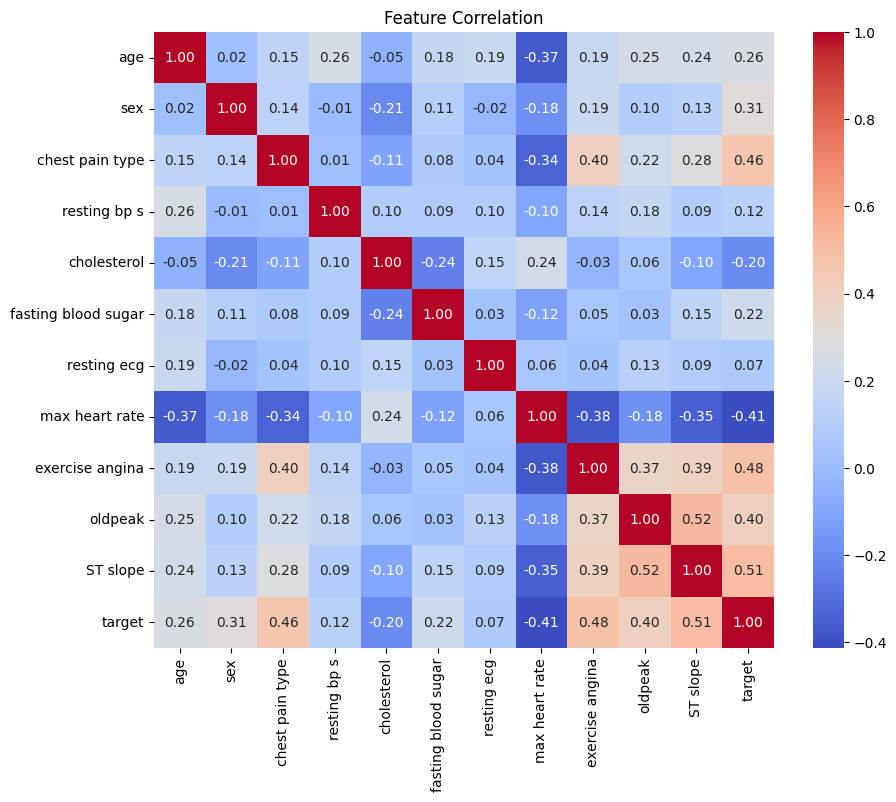

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

In [10]:
# Data Preprocessing
# Define features and target
X = data.drop('target', axis=1)
y = data['target']

In [11]:
# Identify categorical and numeric columns
categorical_features = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
numeric_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

In [12]:
# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [13]:
# Model Development
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

/tmp/ipykernel_21370/3367506909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


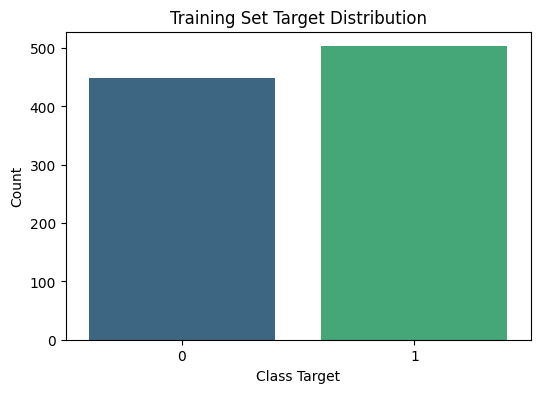

/tmp/ipykernel_21370/3367506909.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='viridis')


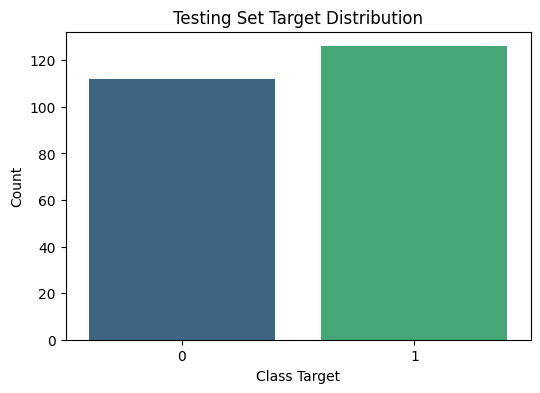

In [14]:
# Display training and testing set distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='viridis')
plt.title('Training Set Target Distribution')
plt.xlabel('Class Target')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, palette='viridis')
plt.title('Testing Set Target Distribution')
plt.xlabel('Class Target')
plt.ylabel('Count')
plt.show()

In [15]:
# Create a pipeline with a Random Forest model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [16]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

/home/sbapan/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/sbapan/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sbapan/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sbapan/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/sbapan/venv/lib/python3.12/site-packages/sklearn/metrics/_score

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'resting '
                                                                          'bp '
                                                                          's',
                                                                          'cholesterol',
                                                                          'max '
                                                                          'heart '
                                                                          'rate',
                                                                          'oldpeak']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['sex',
                                                                          'chest '
                                                                          'pain '
                                                                          'type',
                                                                          'fasting '
                                                                          'blood '
                                                                          'sugar',
                                                                          'resting '
                                                                          'ecg',
                                                                          'exercise '
                                                                          'angina',
                                                                          'ST '
                                                                          'slope'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='f1')

In [17]:
# Best model
best_model = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


In [18]:
# Model Evaluation
# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [19]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       112
           1       0.96      0.90      0.93       126

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



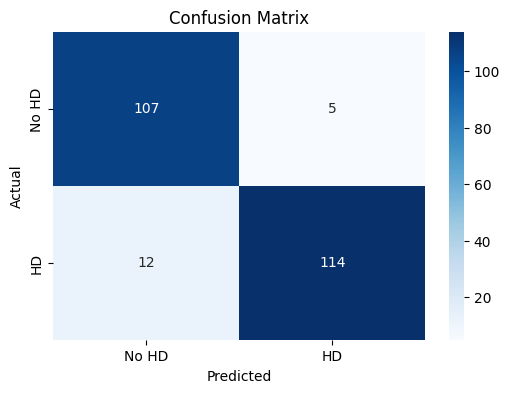

In [20]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No HD', 'HD'], yticklabels=['No HD', 'HD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9796272675736961


/tmp/ipykernel_21370/2309127554.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


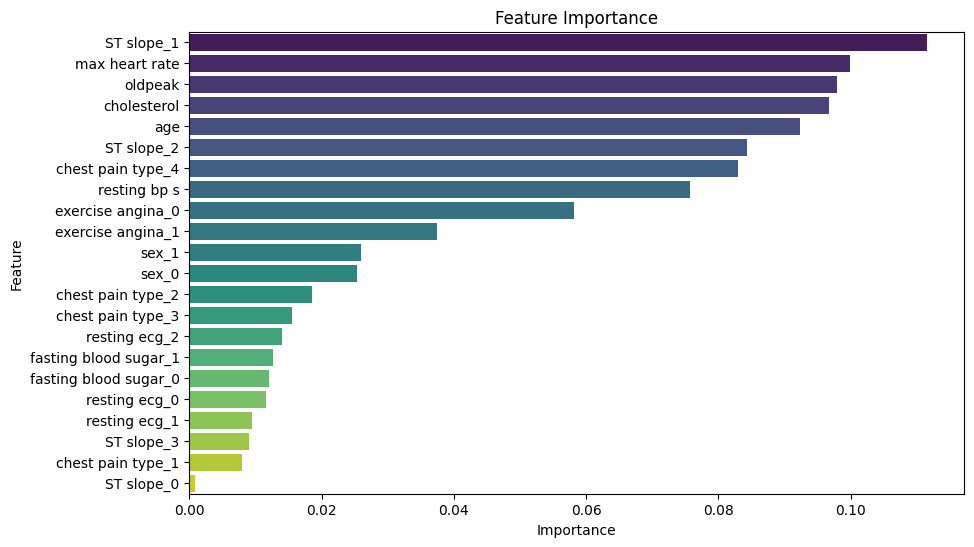

In [22]:
# Feature importance visualization (for Random Forest)
feature_importances = best_model.named_steps['classifier'].feature_importances_
feature_names = numeric_features + list(best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [23]:
# Save the trained model
import joblib
joblib.dump(best_model, 'heart_disease_model.pkl')
print("Model saved as 'heart_disease_model.pkl'")

Model saved as 'heart_disease_model.pkl'


In [24]:
# Load and Test the Saved Model
# Load the saved model
loaded_model = joblib.load('heart_disease_model.pkl')
print("Model loaded successfully.")

Model loaded successfully.


In [25]:
# Test the loaded model with test data
y_loaded_pred = loaded_model.predict(X_test)
y_loaded_proba = loaded_model.predict_proba(X_test)[:, 1]

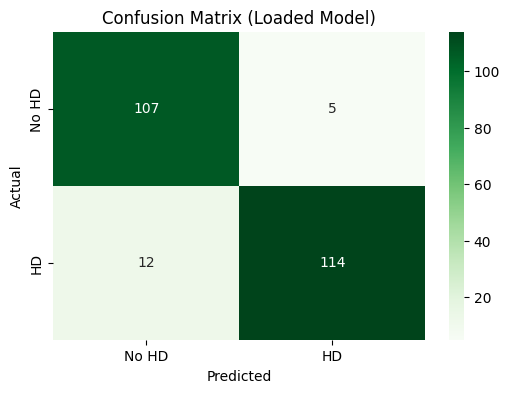


ROC-AUC Score (Loaded Model): 0.9796272675736961


<Figure size 800x600 with 0 Axes>

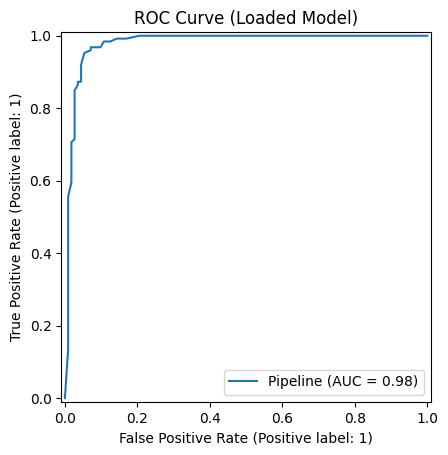

In [26]:
# Visualize the loaded model results
conf_matrix_loaded = confusion_matrix(y_test, y_loaded_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=['No HD', 'HD'], yticklabels=['No HD', 'HD'])
plt.title('Confusion Matrix (Loaded Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc_loaded = roc_auc_score(y_test, y_loaded_proba)
print("\nROC-AUC Score (Loaded Model):", roc_auc_loaded)

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(loaded_model, X_test, y_test)
plt.title('ROC Curve (Loaded Model)')
plt.show()